<a href="https://colab.research.google.com/github/ppprakharr/CNN---Plant-disease-classification/blob/main/Plant_Disease_Image_classifier_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# configure the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Alternative method

In [ ]:
kaggle_credentials = json.load(open("kaggle.json"))
os.environ['KAGGLE_USERNAME']=kaggle_credentials['username']
os.environ['KAGGLE_KEY']=kaggle_credentials['key']

Downloading the dataset

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

 99% 2.02G/2.04G [00:18<00:00, 199MB/s]
100% 2.04G/2.04G [00:18<00:00, 116MB/s]


In [ ]:
!ls


kaggle.json  plantvillage-dataset.zip  sample_data


Extacting the zip file

In [ ]:
from zipfile import ZipFile
import os

In [ ]:
zip_path='/content/plantvillage-dataset.zip'
with ZipFile(zip_path,'r') as zip:
  zip.extractall()
  print('file is unzipped')

file is unzipped


In [ ]:
!ls


 kaggle.json  'plantvillage dataset'   plantvillage-dataset.zip   sample_data


**Seeding for reproducibility**

In [ ]:
import random
random.seed(1)

import numpy as np
np.random.seed(1)

import tensorflow as tf
tf.random.set_seed(1)

Importing the dependencies

In [ ]:
import json
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models

In [ ]:
print(os.listdir('/content/plantvillage dataset/'))

['grayscale', 'color', 'segmented']


In [ ]:
print(len(os.listdir('/content/plantvillage dataset/segmented/')))
print(os.listdir('/content/plantvillage dataset/segmented/')[:5])

print(len(os.listdir('/content/plantvillage dataset/color/')))
print(os.listdir('/content/plantvillage dataset/color/')[:5])

print(len(os.listdir('/content/plantvillage dataset/grayscale/')))
print(os.listdir('/content/plantvillage dataset/grayscale/')[:5])


38
['Squash___Powdery_mildew', 'Tomato___Late_blight', 'Orange___Haunglongbing_(Citrus_greening)', 'Grape___Esca_(Black_Measles)', 'Corn_(maize)___Common_rust_']
38
['Squash___Powdery_mildew', 'Tomato___Late_blight', 'Orange___Haunglongbing_(Citrus_greening)', 'Grape___Esca_(Black_Measles)', 'Corn_(maize)___Common_rust_']
38
['Squash___Powdery_mildew', 'Tomato___Late_blight', 'Orange___Haunglongbing_(Citrus_greening)', 'Grape___Esca_(Black_Measles)', 'Corn_(maize)___Common_rust_']


**Number of Classes = 38**

In [ ]:
# checking for individual subdirectory

print(len(os.listdir('/content/plantvillage dataset/color/Squash___Powdery_mildew')))
print(os.listdir('/content/plantvillage dataset/color/Squash___Powdery_mildew')[:5])


1835
['510e315d-12fb-4f6d-9286-97a34ad86f36___MD_Powd.M 1054.JPG', 'eb78a050-6194-40c5-883e-88a3c36acc0e___MD_Powd.M 0784.JPG', '5af39a25-6486-4944-a14b-382a728ec360___MD_Powd.M 0154.JPG', '1b59eac4-0e49-46e8-a4a6-159dc2f76adb___MD_Powd.M 0152 copy.jpg', '2e531dd7-e282-4e5c-ac21-1b29b6c4ea59___UMD_Powd.M 0637.JPG']


In [ ]:
#dataset path
base_dir='/content/plantvillage dataset/color/'

/content/plantvillage dataset/color/Squash___Powdery_mildew/510e315d-12fb-4f6d-9286-97a34ad86f36___MD_Powd.M 1054.JPG


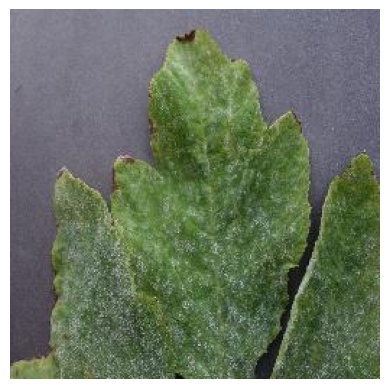

In [ ]:
#check for one image
img_path = base_dir+'Squash___Powdery_mildew/510e315d-12fb-4f6d-9286-97a34ad86f36___MD_Powd.M 1054.JPG'
print(img_path)
img=mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
print(type(img))

<class 'numpy.ndarray'>


In [ ]:
img.shape

(256, 256, 3)

In [ ]:
# image parameter
img_size=224
batch_size=32

**Train Test Split**

In [ ]:
# image data generator
data_gen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [ ]:
#train generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [ ]:
#test generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


**Creating CNN Network**

In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(img_size,img_size,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(train_generator.num_classes,activation='softmax'))

In [ ]:
#model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 256)              

In [ ]:
# compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples//batch_size,
)

Epoch 1/5
339/339 [==============================] - 1432s 4s/step - loss: 1.9271 - accuracy: 0.5571 - val_loss: 0.5935 - val_accuracy: 0.8332
Epoch 2/5
339/339 [==============================] - 1469s 4s/step - loss: 0.5462 - accuracy: 0.8410 - val_loss: 0.2590 - val_accuracy: 0.9216
Epoch 3/5
339/339 [==============================] - 1453s 4s/step - loss: 0.2044 - accuracy: 0.9383 - val_loss: 0.1199 - val_accuracy: 0.9650
Epoch 4/5
339/339 [==============================] - 1434s 4s/step - loss: 0.0862 - accuracy: 0.9732 - val_loss: 0.0438 - val_accuracy: 0.9902
Epoch 5/5
339/339 [==============================] - 1436s 4s/step - loss: 0.0665 - accuracy: 0.9807 - val_loss: 0.0333 - val_accuracy: 0.9910


In [ ]:
# model evaluation

loss,acc=model.evaluate(validation_generator,steps=validation_generator.samples//batch_size)

339/339 [==============================] - 351s 1s/step - loss: 0.0333 - accuracy: 0.9910


**Building a predictive system**

In [ ]:
def load_and_preprocess_image(image_path,target_size=(224,224)):
  #Load the image
  img=Image.open(image_path)
  # resize the image
  img=img.resize(target_size)
  #convert to np array
  img_array=np.array(img)
  #add batch dimensions
  img_array=np.expand_dims(img_array,axis=0)
  #scaling the array
  img_array=img_array.astype('float32')/255
  return img_array

  # function to predict the class of image
def predict_image_class(model,image_path,class_indices):
  preprocessed_image=load_and_preprocess_image(image_path)
  predict = model.predict(preprocessed_image)
  predict_index=np.argmax(predict,axis=1)[0]
  predict_class_name=class_indices[predict_index]
  return predict_class_name


In [ ]:
class_indices={v:k for k,v in train_generator.class_indices.items()}

In [ ]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:
# testing
path='/content/potato-blight.jpg'
result = predict_image_class(model,path,class_indices)
print('The result is: ',result)


1/1 [==============================] - 0s 188ms/step
The result is:  Corn_(maize)___Northern_Leaf_Blight
